<a href="https://colab.research.google.com/github/Ready2Goooo/EBME421/blob/main/NEURON_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuron==8.2.2
!pip install openpyxl
from neuron import h, gui
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

# Replace 'path/to/your/file.xlsx' with the actual path to your file
workbook = openpyxl.load_workbook('interpolated_data.xlsx', data_only=True)

# Select the worksheet you want to load data from
worksheet = workbook['Sheet1']  # Replace 'Sheet1' with the actual sheet name

# Get the maximum column index
max_col = worksheet.max_column

# Extract the data into a NumPy array
data = []
for row in worksheet.iter_rows(min_col=1, max_col=max_col):
  row_data = [cell.value for cell in row]
  data.append(row_data)

extracellular_potentials = np.array(data)
print(extracellular_potentials[:5])

[[0.         0.06352946 0.06386079 0.06385351]
 [0.03218884 0.06352922 0.06386103 0.06385387]
 [0.06437768 0.0635287  0.06386104 0.06385402]
 [0.09656652 0.0635282  0.06386105 0.06385416]
 [0.12875536 0.06352784 0.06386106 0.0638543 ]]


Segment 0: Position = 5.0 microns, Extracellular Potential = 0.06467645873095709 mV
Segment 1: Position = 15.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 2: Position = 25.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 3: Position = 35.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 4: Position = 45.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 5: Position = 55.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 6: Position = 65.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 7: Position = 74.99999999999999 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 8: Position = 85.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 9: Position = 95.0 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 10: Position = 104.99999999999999 microns, Extracellular Potential = 0.0462144445359178 mV
Segment 11: Position = 115.0 microns, Extracellu

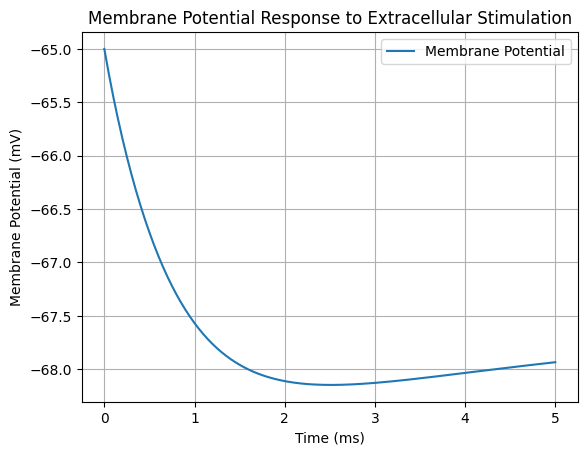

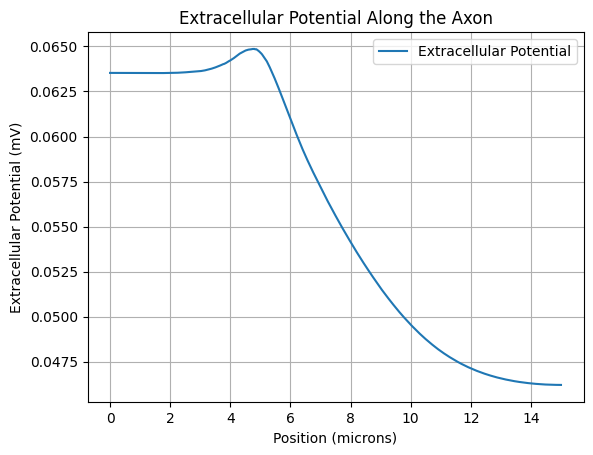

In [ ]:
from neuron import h
import numpy as np
import matplotlib.pyplot as plt

# Define axon properties
axon = h.Section(name='axon')
axon.L = 15000  # Length of the axon in microns
axon.diam = 3000  # Diameter of the axon in microns
axon.insert('hh')  # Hodgkin-Huxley ion channels
axon.insert('extracellular')  # Extracellular mechanism
axon.insert('pas')  # Passive properties (like membrane resistance)
axon.nseg = 1500

# Load the extracellular potential data (assuming this is pre-calculated)
# Example: extracellular_potentials = np.array([[0, -70], [1000, -65], [2000, -60], ...])
x_vals = extracellular_potentials[:, 0]  # Positions in microns
potentials = extracellular_potentials[:, 1]  # Corresponding potentials (in mV or another unit)

# Number of segments for the axon
nseg = axon.nseg

# Create an object reference for the stimulus vectors (one per segment)
stimvec = []
for _ in range(nseg):
    stimvec.append(h.Vector())

# Calculate the normalized distance of the first segment and the length of each segment
fract_dist_of_first_segment = (axon.L / nseg / 2) / axon.L  # Position of the first segment (normalized)
inter_segment_fract_length = 1 / nseg  # Fractional length of each segment

# Loop over each segment to apply the extracellular potential
for i in range(nseg):
    # Compute the normalized position of each segment along the axon
    x_position = fract_dist_of_first_segment + i * inter_segment_fract_length

    # Find the closest position from `x_vals` for the current segment
    closest_idx = np.abs(x_vals - (x_position * axon.L)).argmin()
    e_value = potentials[closest_idx]  # Extracellular potential at this position

    # Assign the extracellular potential to the segment using e_extracellular
    # Note: the e_extracellular value must be applied to the correct segment (not as a vector)
    axon(x_position).e_extracellular = e_value

    # Optionally, print the extracellular potential at this segment for verification
    print(f"Segment {i}: Position = {x_position * axon.L} microns, Extracellular Potential = {e_value} mV")

# Run the simulation
h.run()

# Create a vector to record the membrane potential
v = h.Vector()
v.record(axon(0.5)._ref_v)  # Record membrane potential at the center of the axon (0.5)

# Run the simulation
h.run()

# Create a vector to record the membrane potential
v = h.Vector()
t = h.Vector()  # Create a separate vector for time
v.record(axon(0.5)._ref_v)  # Record membrane potential at the center of the axon (0.5)
t.record(h._ref_t)  # Record the simulation time

# Run the simulation
h.run()

# Convert the vectors into numpy arrays for easier plotting
t_values = np.array(t)  # Time values
v_values = np.array(v)  # Membrane potential values

# Plot the membrane potential over time
plt.plot(t_values, v_values, label="Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Membrane Potential Response to Extracellular Stimulation")
plt.grid(True)
plt.legend()
plt.show()



# Optionally, plot the extracellular potential along the axon
plt.plot(x_vals, potentials, label="Extracellular Potential")
plt.xlabel("Position (microns)")
plt.ylabel("Extracellular Potential (mV)")
plt.title("Extracellular Potential Along the Axon")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
x = np.array([0, 5, 10, 15, 20])  # positions along the axon in microns
y = np.array([0, 3, 1, 4, 2])  # extracellular potential at these positions

# Create an interpolator function
interpolator = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Interpolate at new positions
new_x = np.array([2, 7, 12, 17])  # New positions where we want to interpolate
new_y = interpolator(new_x)  # Interpolated values at these positions

print(new_x)  # New positions
print(new_y)  # Interpolated potentials at those positions